## File 3: Feature Selection

### Overview
In this file, we performed feature selection using various techniques to identify the most important features for predicting bank customer churn. The methods employed include:

- Correlation Analysis
- Random Forest Feature Importance
- Gradient Boosting Feature Importances
- Permutation Importance
- Recursive Feature Elimination (RFE)
- Logistic Regression Weights
- SHAP (SHapley Additive exPlanations)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("data/churn_modelling_feature_engineering.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,France_Female,40,84,0,0,0.000000,Low,0.499975,2.000000,1,Long-term,0.000000e+00,0,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Spain_Female,40,41,0,0,0.744677,Low,0.999900,1.000000,0,New,5.095518e+07,0,83807.860000
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,France_Female,40,336,0,1,1.401375,Low,0.374995,2.666667,0,Long-term,8.014972e+07,0,53220.266667
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,France_Female,30,39,0,0,0.000000,Medium,1.999800,0.500000,0,New,0.000000e+00,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Spain_Female,40,86,0,1,1.587055,High,0.499975,2.000000,1,Long-term,1.066842e+08,1,125510.820000


In [5]:
# Create a copy of the original data for label encoding
data = df.copy()

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data[col] = oe.fit_transform(data[[col]])

# Splitting the dataset into training and testing sets
X_label = data.drop('Exited', axis=1)
y_label = data['Exited']

In [7]:
X_label

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Gender,AgeGroup,Age_Tenure_Interaction,IsSenior,High_Balance,Balance_to_Salary_Ratio,CreditScoreTier,Products_Per_Tenure,Average_Product_Holding_Duration,IsActive_by_CreditCard,Customer_Status,CreditScore_Balance_Interaction,High_CreditScore,Balance_per_Product
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,0.0,40,84,0,0,0.000000,1.0,0.499975,2.000000,1,0.0,0.000000e+00,0,0.000000
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,4.0,40,41,0,0,0.744677,1.0,0.999900,1.000000,0,1.0,5.095518e+07,0,83807.860000
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,0.0,40,336,0,1,1.401375,1.0,0.374995,2.666667,0,0.0,8.014972e+07,0,53220.266667
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0.0,30,39,0,0,0.000000,2.0,1.999800,0.500000,0,1.0,0.000000e+00,0,0.000000
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,4.0,40,86,0,1,1.587055,0.0,0.499975,2.000000,1,0.0,1.066842e+08,1,125510.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,1.0,30,195,0,0,0.000000,0.0,0.399992,2.500000,0,0.0,0.000000e+00,1,0.000000
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,1.0,30,350,0,0,0.564108,1.0,0.099999,10.000000,1,0.0,2.960272e+07,0,57369.610000
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,0.0,30,252,0,0,0.000000,2.0,0.142855,7.000000,0,0.0,0.000000e+00,1,0.000000
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,3.0,40,126,0,0,0.808230,0.0,0.666644,1.500000,0,0.0,5.795814e+07,1,37537.655000


## Technique 1 - Correlation Analysis

<Axes: >

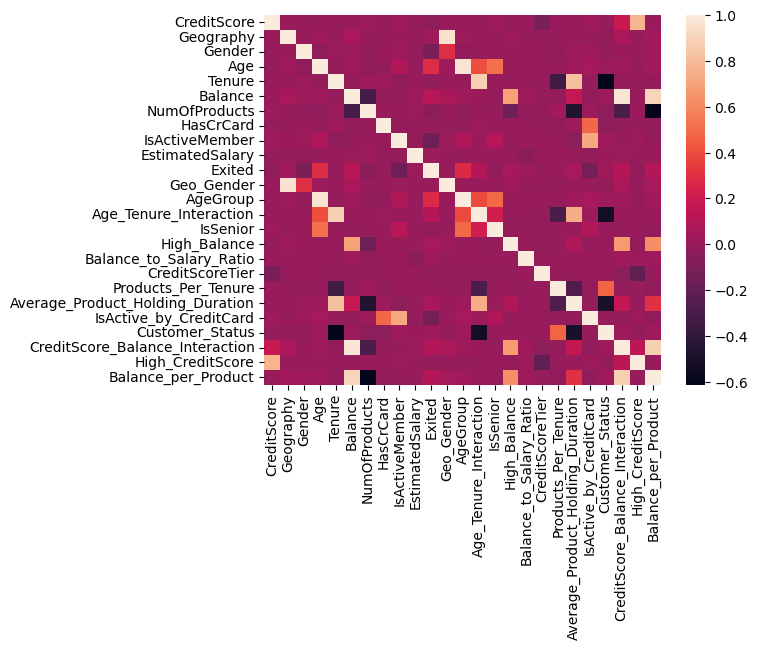

In [33]:
sns.heatmap(data.corr())

In [34]:
fi_df1 = data.corr()['Exited'].to_frame().reset_index().rename(columns={'index':'feature','Exited':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,CreditScore,-0.027094
1,Geography,0.035943
2,Gender,-0.106512
3,Age,0.285323
4,Tenure,-0.014001
5,Balance,0.118533
6,NumOfProducts,-0.047820
7,HasCrCard,-0.007138
8,IsActiveMember,-0.156128
9,EstimatedSalary,0.012097


## Technique 2 - Random Forest Feature Importance

In [40]:
# Train a Random Forest regressor on label encoded data
rf_label = RandomForestClassifier(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
3,Age,0.132153
6,NumOfProducts,0.087837
0,CreditScore,0.075758
9,EstimatedSalary,0.074793
12,Age_Tenure_Interaction,0.069190
23,Balance_per_Product,0.065029
11,AgeGroup,0.063144
5,Balance,0.058000
21,CreditScore_Balance_Interaction,0.056092
15,Balance_to_Salary_Ratio,0.054604


## Technique 3 - Gradient Boosting Feature importances

In [41]:
# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingClassifier()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
3,Age,0.392126
6,NumOfProducts,0.308765
8,IsActiveMember,0.118726
23,Balance_per_Product,0.027245
15,Balance_to_Salary_Ratio,0.025688
1,Geography,0.021948
10,Geo_Gender,0.020114
5,Balance,0.018686
0,CreditScore,0.017219
2,Gender,0.014968


## Technique 4 - Permutation Importance

In [42]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestClassifier(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,NumOfProducts,4.168333e-02
3,Age,3.173333e-02
8,IsActiveMember,1.876667e-02
11,AgeGroup,1.316667e-02
10,Geo_Gender,5.733333e-03
1,Geography,4.916667e-03
23,Balance_per_Product,4.733333e-03
0,CreditScore,2.916667e-03
19,IsActive_by_CreditCard,2.683333e-03
21,CreditScore_Balance_Interaction,2.633333e-03


## Technique 5 - RFE

In [45]:
# Initialize the base estimator
estimator = RandomForestClassifier()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df5 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df5

,feature,rfe_score
3,Age,0.130812
6,NumOfProducts,0.089208
9,EstimatedSalary,0.075315
0,CreditScore,0.075028
12,Age_Tenure_Interaction,0.067418
23,Balance_per_Product,0.067107
11,AgeGroup,0.062495
5,Balance,0.059429
21,CreditScore_Balance_Interaction,0.055924
15,Balance_to_Salary_Ratio,0.054677


## Technique 6 - Logistic Regression Weights

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_label, y_label)

# Extract coefficients
fi_df6 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': log_reg.coef_[0]
}).sort_values(by='reg_coeffs', ascending=False)

fi_df6

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,reg_coeffs
15,Balance_to_Salary_Ratio,1.094215e-06
23,Balance_per_Product,4.432993e-07
14,High_Balance,3.200419e-09
21,CreditScore_Balance_Interaction,-9.291358e-10
13,IsSenior,-8.938178e-09
20,Customer_Status,-1.388701e-08
22,High_CreditScore,-5.006689e-08
1,Geography,-8.898581e-08
7,HasCrCard,-1.253418e-07
19,IsActive_by_CreditCard,-1.356362e-07


## Technique 7 - SHAP

In [48]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[array([[-0.0291785 , -0.00728735, -0.02881646, ..., -0.01067787,
         -0.00557472, -0.01801589],
        [ 0.00858758,  0.00686172, -0.01007004, ...,  0.00164704,
          0.00042704,  0.02165207],
        [-0.01070066,  0.00175763, -0.01791703, ..., -0.02169801,
         -0.00140682, -0.02228935],
        ...,
        [-0.03662833, -0.00694572, -0.03699332, ..., -0.02411496,
         -0.01072389, -0.02790604],
        [-0.02536538, -0.02111538, -0.00709193, ..., -0.04744652,
         -0.00159527, -0.03929565],
        [-0.0014158 ,  0.02102647, -0.02268869, ...,  0.00649633,
         -0.00197445, -0.00731626]]),
 array([[ 0.0291785 ,  0.00728735,  0.02881646, ...,  0.01067787,
          0.00557472,  0.01801589],
        [-0.00858758, -0.00686172,  0.01007004, ..., -0.00164704,
         -0.00042704, -0.02165207],
        [ 0.01070066, -0.00175763,  0.01791703, ...,  0.02169801,
          0.00140682,  0.02228935],
        ...,
        [ 0.03662833,  0.00694572,  0.03699332, ...,  

In [67]:
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.mean([np.abs(shap_values[0]), np.abs(shap_values[1])], axis=0).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df7

,feature,SHAP_score
3,Age,0.063534
6,NumOfProducts,0.044916
11,AgeGroup,0.043002
8,IsActiveMember,0.037001
5,Balance,0.017534
2,Gender,0.016380
23,Balance_per_Product,0.016363
19,IsActive_by_CreditCard,0.015633
21,CreditScore_Balance_Interaction,0.013984
10,Geo_Gender,0.013585


In [68]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [69]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,
CreditScore,-0.027094,0.075758,0.017219,2.916667e-03,0.075028,-1.114783e-04,0.009447
Geography,0.035943,0.019945,0.021948,4.916667e-03,0.018871,-8.898581e-08,0.012215
Gender,-0.106512,0.013328,0.014968,-5.000000e-04,0.012562,-1.540677e-07,0.016380
Age,0.285323,0.132153,0.392126,3.173333e-02,0.130812,-3.187427e-06,0.063534
Tenure,-0.014001,0.029455,0.000150,-1.800000e-03,0.029249,-8.966583e-07,0.008498
Balance,0.118533,0.058000,0.018686,1.000000e-04,0.059429,-1.898297e-06,0.017534
NumOfProducts,-0.047820,0.087837,0.308765,4.168333e-02,0.089208,-3.009021e-07,0.044916
HasCrCard,-0.007138,0.011969,0.000067,5.500000e-04,0.011933,-1.253418e-07,0.002827
IsActiveMember,-0.156128,0.030040,0.118726,1.876667e-02,0.028947,-1.780158e-07,0.037001


In [70]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [71]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
Age                                 0.210465
NumOfProducts                       0.181286
IsActiveMember                      0.082226
AgeGroup                            0.067595
Balance_per_Product                 0.047342
CreditScore                         0.042797
EstimatedSalary                     0.040144
Balance                             0.036574
CreditScore_Balance_Interaction     0.036098
Age_Tenure_Interaction              0.035924
Balance_to_Salary_Ratio             0.034569
Geo_Gender                          0.031457
Geography                           0.025707
Average_Product_Holding_Duration    0.022232
Products_Per_Tenure                 0.022145
IsActive_by_CreditCard              0.018798
Gender                              0.016045
Tenure                              0.013618
CreditScoreTier                     0.010612
HasCrCard                           0.007077
High_Balance                        0.005533
Customer_Status                     0.004967
Hi

In [73]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='accuracy')

In [74]:
scores.mean()

0.8596

In [93]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cols_to_remove = ['IsSenior', 'High_CreditScore','Customer_Status', 'High_Balance','HasCrCard', 'CreditScoreTier', 'Tenure','Gender', 'IsActive_by_CreditCard']

scores = cross_val_score(rf, X_label.drop(columns=cols_to_remove), y_label, cv=5, scoring='accuracy')

In [94]:
scores.mean()

0.8638999999999999